In [41]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GroupShuffleSplit, GroupKFold, train_test_split

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16

In [3]:
df = pd.read_csv("data/cook_county_housing.csv", index_col='Unnamed: 0')

In [4]:
df.shape

(204792, 62)

In [5]:
df.columns
# replacing the space with the "_" in all the columns
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['PIN', 'PropertyClass', 'NeighborhoodCode', 'LandSquareFeet',
       'TownCode', 'Apartments', 'WallMaterial', 'RoofMaterial', 'Basement',
       'BasementFinish', 'CentralHeating', 'OtherHeating', 'CentralAir',
       'Fireplaces', 'AtticType', 'AtticFinish', 'DesignPlan',
       'CathedralCeiling', 'ConstructionQuality', 'SiteDesirability',
       'Garage1Size', 'Garage1Material', 'Garage1Attachment', 'Garage1Area',
       'Garage2Size', 'Garage2Material', 'Garage2Attachment', 'Garage2Area',
       'Porch', 'OtherImprovements', 'BuildingSquareFeet', 'RepairCondition',
       'MultiCode', 'NumberofCommercialUnits', 'Estimate(Land)',
       'Estimate(Building)', 'DeedNo.', 'SalePrice', 'Longitude', 'Latitude',
       'CensusTract', 'MultiPropertyIndicator', 'ModelingGroup', 'Age', 'Use',
       'O'HareNoise', 'Floodplain', 'RoadProximity', 'SaleYear', 'SaleQuarter',
       'SaleHalf-Year', 'SaleQuarterofYear', 'SaleMonthofYear',
       'SaleHalfofYear', 'MostRecentSale', 'AgeDec

In [6]:
pd.set_option('display.max_rows', len(df.dtypes))
df.dtypes

PIN                           int64
PropertyClass                 int64
NeighborhoodCode              int64
LandSquareFeet              float64
TownCode                      int64
Apartments                  float64
WallMaterial                float64
RoofMaterial                float64
Basement                    float64
BasementFinish              float64
CentralHeating              float64
OtherHeating                float64
CentralAir                  float64
Fireplaces                  float64
AtticType                   float64
AtticFinish                   int64
DesignPlan                  float64
CathedralCeiling            float64
ConstructionQuality         float64
SiteDesirability            float64
Garage1Size                 float64
Garage1Material             float64
Garage1Attachment           float64
Garage1Area                 float64
Garage2Size                 float64
Garage2Material             float64
Garage2Attachment           float64
Garage2Area                 

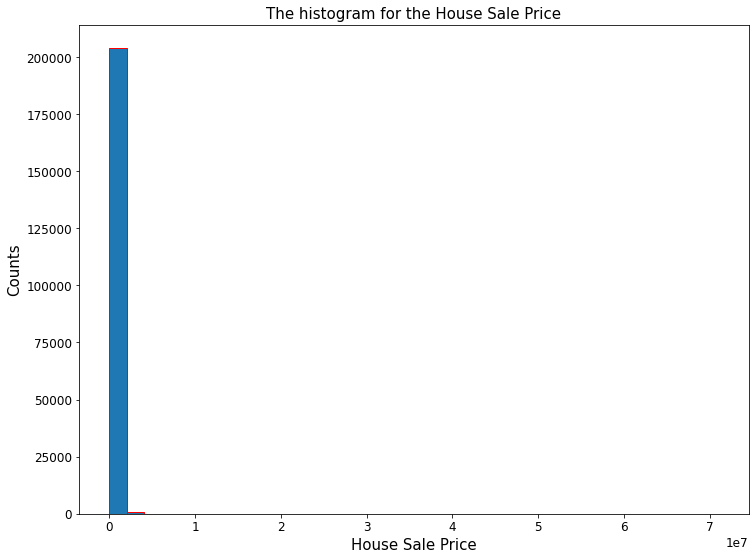

In [7]:
plt.xlabel("House Sale Price", fontsize = 15)
plt.ylabel("Counts", fontsize = 15)
plt.title("The histogram for the House Sale Price", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.hist(df.SalePrice, bins = 35, edgecolor = 'red');

## need to do log transformations
df["LogSalePrice"] = np.log(df["SalePrice"])
#plt.hist(df.LogSalePrice, bins = 35, edgecolor = 'red');

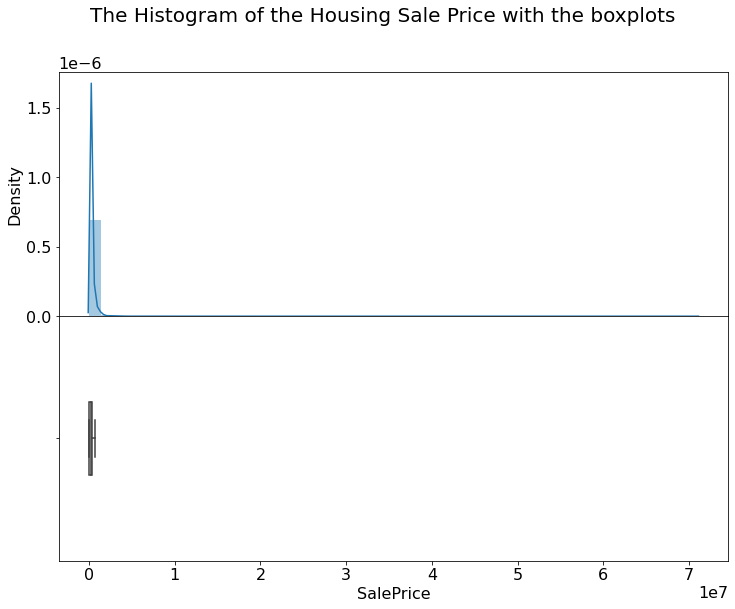

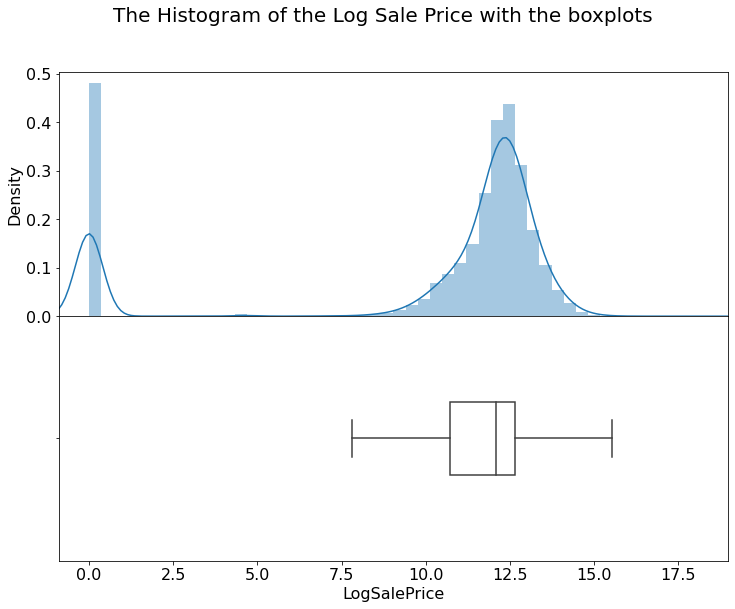

In [43]:
def plot_distribution(data, label, title):
    fig, axs = plt.subplots(nrows=2)
    fig.suptitle(title, fontsize = 20)
    
    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    sns.boxplot(
        data[label],
        width=0.3, 
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))
    # Put the two plots together
    plt.subplots_adjust(hspace=0)

    # Adjust boxplot fill to be white
    axs[1].artists[0].set_facecolor('white')
    
#figure, axis = plt.subplots(ncols = 2)
#plt.subplots(ncols = 2)
plot_distribution(df, label='SalePrice', title = "The Histogram of the Housing Sale Price with the boxplots")
plt.savefig('figures/beforelog.png')
plot_distribution(df, label='LogSalePrice', title = "The Histogram of the Log Sale Price with the boxplots")
plt.savefig('figures/afterlog.png')

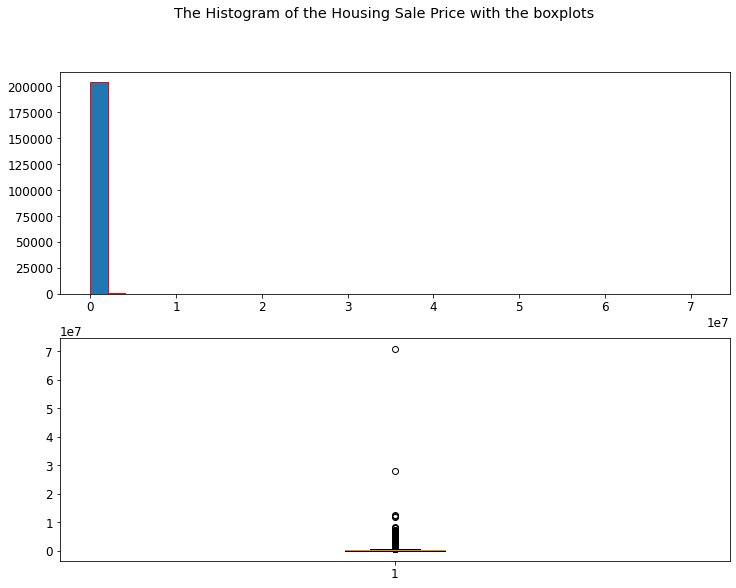

In [13]:
def plot_distribution(data, label, title):
    fig, axs = plt.subplots(nrows=2)
    #sns.set(rc = {'figure.figsize':(10,7)}, font_scale = 1)
    fig.suptitle(title)
    axs[0].hist(df[label], bins= 35, edgecolor = 'red');
    axs[1].boxplot(df[label])
plot_distribution(df, label='SalePrice', title = "The Histogram of the Housing Sale Price with the boxplots")
#plt.savefig('save_as_a_png.png')

In [ ]:
def draw_bar(df, col):
    print(df[col].value_counts())
    tctostr = [str(i) for i in df[col].value_counts().keys()]
    plt.bar(tctostr, df[col].value_counts(), color = 'maroon')

In [45]:
categorical_ftr = ["PropertyClass", "NeighborhoodCode", "TownCode", "Apartments", "WallMaterial", "RoofMaterial",
                  "Basement", "BasementFinish", "CentralHeating", "OtherHeating", "CentralAir", "Fireplaces", "AtticType","AtticFinish",
                  "DesignPlan", "CathedralCeiling", "ConstructionQuality", "SiteDesirability", "Garage1Material", 
                  "Garage1Attachment","Garage1Area", "Garage2Material","Garage2Attachment", "Garage2Area", "Porch", "OtherImprovements",
                  "RepairCondition", "MultiCode", "NumberofCommercialUnits", "CensusTract", "MultiPropertyIndicator",
                  "ModelingGroup", "Use", "O\'HareNoise", "Floodplain", "RoadProximity", "MostRecentSale", "PureMarketFilter",
                  "GarageIndicator", "NeigborhoodCode(mapping)", "TownandNeighborhood"]

non_analysis = ["PIN", "Description", "DeedNo."]
cont_ftr = df.columns[(~df.columns.isin(categorical_ftr)) & (~df.columns.isin(non_analysis))].to_list()

len(categorical_ftr) + len(non_analysis) + len(cont_ftr) == len(df.columns)

True

In [81]:
df.MostRecentSale

0         1.0
1         1.0
2         0.0
3         1.0
4         0.0
         ... 
204787    0.0
204788    1.0
204789    1.0
204790    1.0
204791    0.0
Name: MostRecentSale, Length: 204792, dtype: float64

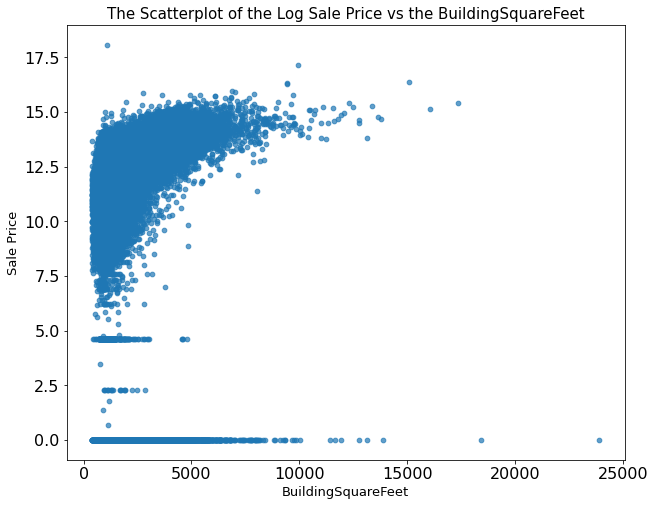

In [106]:
plt.figure(figsize = (10,8))
plt.scatter(df["BuildingSquareFeet"], df.LogSalePrice, s = 22, alpha = 0.7)
plt.xlabel("BuildingSquareFeet", fontsize = 13)
plt.ylabel("Sale Price", fontsize = 13)
plt.title("The Scatterplot of the Log Sale Price vs the BuildingSquareFeet", fontsize= 15);

In [ ]:
for ftr in categorical_ftr:
    draw_bar(df, ftr)

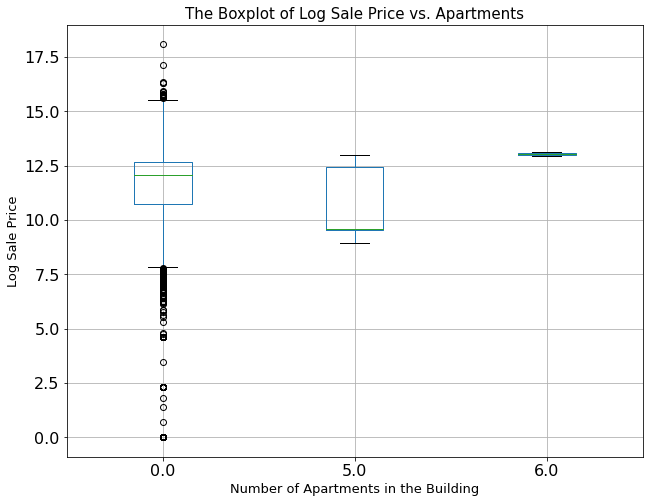

In [93]:
bed_with_y = df[["Apartments", "LogSalePrice"]]
bed_with_y.boxplot(figsize=(10, 8), by = "Apartments");
plt.xlabel("Number of Apartments in the Building", fontsize = 13);
plt.ylabel("Log Sale Price", fontsize = 13);
plt.suptitle('')
plt.title("The Boxplot of Log Sale Price vs. Apartments", fontsize = 15);
plt.savefig('figures/logspandapt.png')

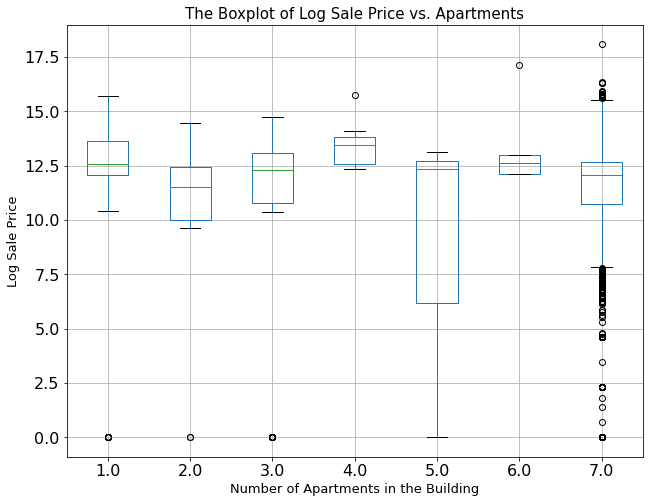

In [95]:
bed_with_y = df[["Garage2Size", "LogSalePrice"]]
bed_with_y.boxplot(figsize=(10, 8), by = "Garage2Size");
plt.xlabel("Number of Apartments in the Building", fontsize = 13);
plt.ylabel("Log Sale Price", fontsize = 13);
plt.suptitle('')
plt.title("The Boxplot of Log Sale Price vs. Apartments", fontsize = 15);
plt.savefig('figures/logspandapt.png')

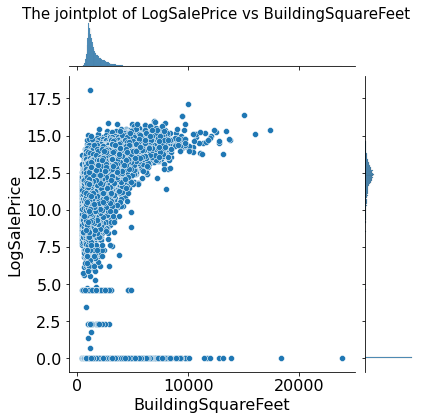

In [126]:
before_log = sns.jointplot(data = df, x = "BuildingSquareFeet", y = "LogSalePrice", ratio = 5)
before_log.fig.suptitle("The jointplot of LogSalePrice vs BuildingSquareFeet", fontsize = 15);
plt.savefig('figures/logspbsf.png')

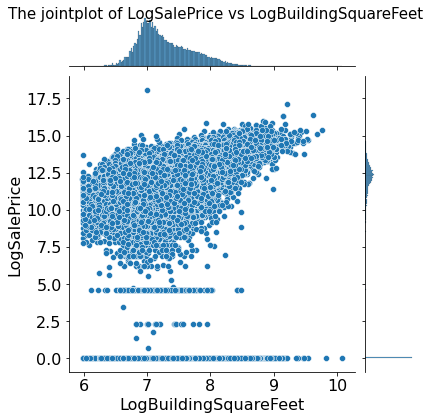

In [127]:
df["LogBuildingSquareFeet"] = np.log(df["BuildingSquareFeet"])
after_log = sns.jointplot(data = df, x = "LogBuildingSquareFeet", y = "LogSalePrice", ratio = 5)
after_log.fig.suptitle("The jointplot of LogSalePrice vs LogBuildingSquareFeet", fontsize = 15);
plt.savefig('figures/logspandlogapt.png')

In [112]:
a.fig.suptitle("The jointplot of LogSalePrice vs LogBuildingSquareFeet")
a.ax_joint.collections[0].set_alpha(0)
a.fig.tight_layout()
a.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

In [ ]:
# Pin
# This is a key column, every values is unique, it could be used as an id but has nothing to do with the data
# Plain Text

In [ ]:
# Property Class
# categorical, might need one-hot feature
# note, this is a bit imbalanced
draw_bar(df, "PropertyClass")

In [ ]:
# Neighborhood Code
# categorical, might need one-hot preprocess


In [ ]:
# Land Square Feet
# numerical, continuous, use std
# might need log transformation
plt.figure(figsize = (10, 8))
plt.xlabel("LandSquareFeet", fontsize = 15)
plt.ylabel("Counts", fontsize = 15)
plt.title("The histogram for LandSquareFeet", fontsize = 15)
plt.hist(np.log(df.LandSquareFeet), bins = 30, edgecolor = 'red');

In [ ]:
# TownCode
# Categorical, might need one-hot proprocess
print(df["TownCode"].value_counts())
tctostr = [str(i) for i in df["TownCode"].value_counts().keys()]
plt.bar(tctostr, df["TownCode"].value_counts(), color = 'maroon');

In [ ]:
# Apartments
# Categorical, need one-hot
print(df["TownCode"].value_counts())
tctostr = [str(i) for i in df["TownCode"].value_counts().keys()]
plt.bar(tctostr, df["TownCode"].value_counts(), color = 'maroon');

In [ ]:
def auto_visual(df, y_name):
    col_names_noy = df.columns[df.columns != y_name]
    for col in col_names_noy:
        if ((df[col].dtype == "O") or 
            (df[col].dtype == "int64" and 
             df[col].nunique() <= 15 and
             df[df[col]!=0][col].nunique()/df[df[col] != 0][col].count() < 0.05)):
            this_df = df[[col, y_name]]
            this_df.boxplot(figsize = (8, 8), by = col)
            plt.suptitle("The plot is Grouped by %a" %col, fontsize = 15)
            plt.title("Sale Price vs. %a" %col, fontsize = 12)
            plt.xticks(rotation = 45)
            plt.xlabel(col, fontsize = 13)
            plt.ylabel(y_name, fontsize = 13)
            plt.show()
        else:
            plt.figure(figsize = (8,8))
            plt.scatter(df[col], df[y_name], s = 22, alpha = 0.7)
            plt.title("Sale Price vs. %a" %col, fontsize = 15)
            plt.xlabel(col, fontsize = 13)
            plt.ylabel(y_name, fontsize = 13)
            plt.show()

#auto_visual(df[], "LogSalePrice")

In [ ]:
df.LogSalePrice.describe()

In [ ]:
df["Grp_LogSalePrice"] = np.zeros(df.shape[0])
df["Grp_LogSalePrice"][df["LogSalePrice"]<2.5] = "lessthan2.5"
df["Grp_LogSalePrice"][(df["LogSalePrice"]>=2.5) & (df["LogSalePrice"]<7.5)] = "between2.5and7.5"
df["Grp_LogSalePrice"][df["LogSalePrice"]>=7.5] = "over7.5"

In [ ]:
plt.boxpl

In [ ]:
# Use stratified splitting
from collections import Counter
y_forsplitting = df[["Grp_LogSalePrice"]]
X_forsplitting = df.loc[:, ((df.columns != "SalePrice") & (df.columns != "LogSalePrice"))]


def stratified_fcn(X, y, train_size, val_size, test_size, strati_tar, random_seed, num_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size= test_size, random_state = random_seed, stratify = strati_tar)
    second_split = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=random_seed)
    ind_needed = X_other.index
    new_strat = strati_tar[ind_needed]
    total = {"X_train":[], "y_train":[], "X_val":[], "y_val":[], "X_test":[], "y_test":[]}
    for train_ind, val_ind in second_split.split(X_other, y_other, groups=new_strat):
        X_train = X_other.iloc[train_ind]
        y_train = y_other.iloc[train_ind]
        X_val = X_other.iloc[val_ind]
        y_val = y_other.iloc[val_ind]
        total["X_val"].append(X_val)
        total["y_val"].append(y_val)
        total["X_train"].append(X_train)
        total["y_train"].append(y_train)
    total["X_test"].append(X_test)
    total["y_test"].append(y_test) 
    return total


splitting = stratified_fcn(X_forsplitting, y_forsplitting, 0.8, 0.1, 0.1, df["Grp_LogSalePrice"], 44, 5) 



X = df.loc[:, ((df.columns != "SalePrice") & (df.columns != "LogSalePrice") & (df.columns != "Grp_LogSalePrice"))]
y = df[["LogSalePrice"]]

def getting_split(df_set):
    training_index = [i.index.to_list() for i in df_set["X_train"]]
    validation_index = [i.index.to_list() for i in df_set["X_val"]]
    testing_index = [i.index.to_list() for i in df_set["X_test"]]
    for i in range(0, len(training_index)):
        #globals()["X_training_fold_" + str(i)] = X.iloc[training_index[i]]
        #globals()["X_validation_fold_" + str(i)] = X.iloc[validation_index[i]]
        #globals()["y_training_fold_" + str(i)] = y.iloc[training_index[i]]
        #globals()["y_validation_fold_" + str(i)] = y.iloc[validation_index[i]]
        globals()["fold_" + str(i)] = {"X_training": X.iloc[training_index[i]], "y_training": y.iloc[training_index[i]], 
                                       "X_validation": X.iloc[validation_index[i]], "y_validation": y.iloc[validation_index[i]],
                                       "X_testing": X.iloc[testing_index[0]], "y_testing": y.iloc[testing_index[0]]}
    return {"fold_1": fold_0, "fold_2": fold_1, "fold_3": fold_2, "fold_4": fold_3, "fold_5": fold_4}




In [ ]:
def transformation(splits):
    transformed = {"X_train_trans":[], "y_train":[], "X_val_trans":[], "y_val":[], "X_test_trans":[], "y_test":[]}
    std_ftrs_class = df3.columns[(df3.columns != "Class") & (df3.columns != 'User')]

    preprocessor_class = ColumnTransformer(
        transformers = [
            ('std', StandardScaler(), std_ftrs_class)])

    clf = Pipeline(steps=[('preprocessor', preprocessor_class)])
    for i in range(len(splits["X_train"])):
        X2_train_prep = clf.fit_transform(splits["X_train"][i])
        X2_val_prep = clf.transform(splits["X_val"][i])
        X2_test_prep = clf.transform(splits["X_test"][0])
        transformed["X_train_trans"].append(X2_train_prep)
        transformed["X_val_trans"].append(X2_val_prep)
        transformed["X_test_trans"].append(X2_test_prep)
    transformed["y_train"] = splits["y_train"]
    transformed["y_val"] = splits["y_val"]
    transformed["y_test"] = splits["y_test"]
    return transformed

transformation_2b(splitting)

In [128]:
df.columns

Index(['PIN', 'PropertyClass', 'NeighborhoodCode', 'LandSquareFeet',
       'TownCode', 'Apartments', 'WallMaterial', 'RoofMaterial', 'Basement',
       'BasementFinish', 'CentralHeating', 'OtherHeating', 'CentralAir',
       'Fireplaces', 'AtticType', 'AtticFinish', 'DesignPlan',
       'CathedralCeiling', 'ConstructionQuality', 'SiteDesirability',
       'Garage1Size', 'Garage1Material', 'Garage1Attachment', 'Garage1Area',
       'Garage2Size', 'Garage2Material', 'Garage2Attachment', 'Garage2Area',
       'Porch', 'OtherImprovements', 'BuildingSquareFeet', 'RepairCondition',
       'MultiCode', 'NumberofCommercialUnits', 'Estimate(Land)',
       'Estimate(Building)', 'DeedNo.', 'SalePrice', 'Longitude', 'Latitude',
       'CensusTract', 'MultiPropertyIndicator', 'ModelingGroup', 'Age', 'Use',
       'O'HareNoise', 'Floodplain', 'RoadProximity', 'SaleYear', 'SaleQuarter',
       'SaleHalf-Year', 'SaleQuarterofYear', 'SaleMonthofYear',
       'SaleHalfofYear', 'MostRecentSale', 'AgeDec

In [129]:
cont_ftr

['LandSquareFeet',
 'Garage1Size',
 'Garage2Size',
 'BuildingSquareFeet',
 'Estimate(Land)',
 'Estimate(Building)',
 'SalePrice',
 'Longitude',
 'Latitude',
 'Age',
 'SaleYear',
 'SaleQuarter',
 'SaleHalf-Year',
 'SaleQuarterofYear',
 'SaleMonthofYear',
 'SaleHalfofYear',
 'AgeDecade',
 'LotSize',
 'LogSalePrice']

In [ ]:
len(Counter(splitting["X_train"][0].index.to_list() + splitting["X_test"][0].index.to_list() + splitting["X_val"][0].index.to_list()).keys()) == df.shape[0]

In [145]:
df["O\'HareNoise"].unique()

array([0., 1.])

(array([201320.,      0.,      0.,      0.,   3472.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

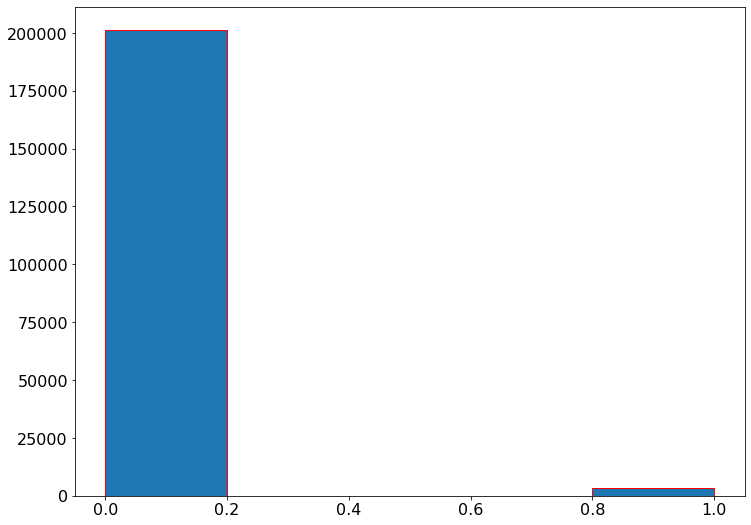

In [144]:
plt.hist(df["O\'HareNoise"], bins = 5, edgecolor = 'red')

In [186]:
maxmin_ftr = ["Garage1Size", 'Garage2Size', 'Longitude','Latitude', "MultiCode"]
std_ftr = ['LandSquareFeet','BuildingSquareFeet', 'Garage2Size','Estimate(Land)','Estimate(Building)', 'Age', 'SaleYear', 
           'SaleQuarter', 'SaleHalf-Year', 'SaleQuarterofYear', 'SaleMonthofYear', 'AgeDecade', 'LotSize','LogBuildingSquareFeet']
no_need = ['PIN', 'DeedNo.', 'Description', 'SalePrice', 'LogSalePrice','CensusTract']
ord_ftr = ["Basement", "BasementFinish","CentralAir", "Fireplaces", "AtticType", "AtticFinish","DesignPlan", 
          "CathedralCeiling", "ConstructionQuality", "SiteDesirability", "Garage1Attachment", "Garage1Area", 
          "Garage2Attachment", "Garage2Area", "RepairCondition", "NumberofCommercialUnits", "Floodplain", 
          "GarageIndicator"]
onehot_ftr = ["PropertyClass","NeighborhoodCode", "TownCode", "Apartments" ,"WallMaterial", "RoofMaterial", 
             "CentralHeating", "OtherHeating","Garage1Material", "Garage2Material", "Porch", "OtherImprovements", 
             "MultiPropertyIndicator", "ModelingGroup", "Use", "O'HareNoise", "RoadProximity", "SaleHalfofYear",
              "MostRecentSale", "PureMarketFilter", "NeigborhoodCode(mapping)", "TownandNeighborhood"]
#check = maxmin_ftr+std_ftr+no_need+ord_ftr+onehot_ftr
#set(check)-set(df.columns.to_list()) == set()

True